# Lab Assignment Five: Wide and Deep Network Architectures
### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng
### 1. Preparation
#### 1.1 Metrics


We choose F1-score to evaluate our algorithm's performance. F1-score combines precision and recall into a single metric, providing a balanced assessment of the model's performance. 

In many real-world scenarios, the distribution of classes in the dataset might not be uniform. Accuracy alone can be misleading in such cases. F1-Score, being the harmonic mean of precision and recall, is less affected by class imbalance compared to accuracy. It provides a balanced assessment of the model's performance across different classes.

Depending on the specific application, false positives and false negatives might have different consequences. F1-Score considers both precision and recall, which allows for a balanced evaluation of false positives and false negatives.

F1-Score is easy to interpret and communicate, especially when compared to more complex metrics like AUC-ROC (Area Under the Receiver Operating Characteristic Curve). Its intuitive nature makes it a preferred choice for reporting model performance to stakeholders who might not have a technical background.

Overall, F1-score is well-suited for our car image classification tasks where achieving high precision and recall simultaneously is desirable. By optimizing for F1 score, we ensure a balance between false positives and false negatives, thus enhancing the overall effectiveness and reliability of the model's predictions.

#### 1.2 Dividing Data


We will use stratified 5-Fold Cross-Validation as it ensures that each fold preserves the percentage of samples for each class. This is crucial, especially when dealing with imbalanced datasets where some classes might be significantly underrepresented. By maintaining the class distribution in each fold, we obtain more reliable estimates of model performance across different subsets of data. 

By training the model on multiple different subsets of the data and evaluating its performance on multiple corresponding test sets, Stratified K-Fold Cross-Validation provides a more realistic estimate of how well the model will generalize to unseen data in practice. This mirrors real-world scenarios where the model needs to perform well on diverse data distributions.

stratified K-Fold Cross-Validation in general provides a more robust estimate of model performance compared to a single train-test split. It reduces the risk of overfitting to a particular training set or being overly sensitive to the random assignment of samples to the training and testing sets.

Since the dataset we choosen is computational expansive for our models, we choose 5 folds instead of 10 folds.

In [101]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

images, labels = [], []
UNIFORMED_SIZE = (64, 64)

# load and resize images
for image_path in Path('..\LabAssignment2\data').rglob('*.jpg'):
    class_name = image_path.parent.stem
    train_test = image_path.parent.parent.stem
    img = cv2.resize(cv2.imread(str(image_path)), UNIFORMED_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    labels.append(class_name)

# concatenate to two ndarrays
images_np = np.concatenate([images])
labels_np = np.concatenate([labels])

# scale image to 0-1
images_np = images_np / 255

# encode string lables to numeric labels
encoder = LabelEncoder()
labels_np = encoder.fit_transform(labels_np)
print(f"Images: {images_np.shape}, Labels: {labels_np.shape}")

Images: (4165, 64, 64, 3), Labels: (4165,)


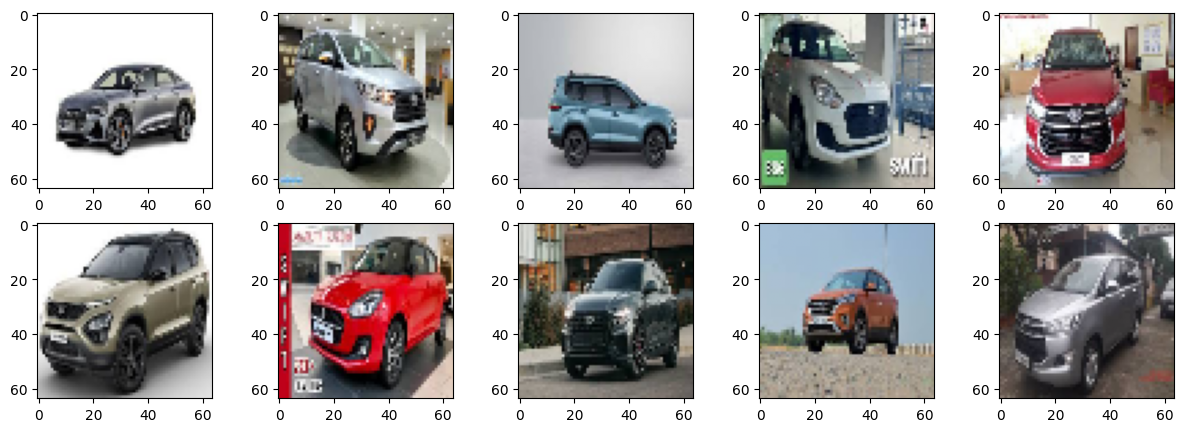

In [102]:
# dataset visualization
plt.figure(figsize=(15, 5))
for i, r_idx in enumerate(np.random.randint(0, images_np.shape[0], 10)):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(images_np[r_idx])

In [103]:
# stratified 5-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold

n_splits = 5
shuffle_splitter = StratifiedKFold(n_splits=n_splits)

# Iterate over splits
for fold, (train_index, test_index) in enumerate(shuffle_splitter.split(images_np, labels_np)):
    X_train, X_test = images_np[train_index], images_np[test_index]
    y_train, y_test = labels_np[train_index], labels_np[test_index]
    print(f"Split {fold+1} - Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Split 1 - Train Shape: (3332, 64, 64, 3), Test Shape: (833, 64, 64, 3)
Split 2 - Train Shape: (3332, 64, 64, 3), Test Shape: (833, 64, 64, 3)
Split 3 - Train Shape: (3332, 64, 64, 3), Test Shape: (833, 64, 64, 3)
Split 4 - Train Shape: (3332, 64, 64, 3), Test Shape: (833, 64, 64, 3)
Split 5 - Train Shape: (3332, 64, 64, 3), Test Shape: (833, 64, 64, 3)


In [104]:
# example training code
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model, to_categorical

img_size = images_np[0].shape
num_class = len(np.unique(labels_np))

cnn = Sequential() 
cnn.add(Conv2D(filters=16, kernel_size = 7) )
cnn.add(BatchNormalization()) # BN could significantly imporve accuracy
cnn.add(Activation('relu'))

cnn.add(Conv2D(filters=8, kernel_size = 3) )
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))

cnn.add(Flatten())
cnn.add(Dense(num_class, activation = 'softmax') )

cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load first split
train_index, test_index = next(shuffle_splitter.split(images_np, labels_np))
X_train, X_test = images_np[train_index], images_np[test_index]
y_train, y_test = labels_np[train_index], labels_np[test_index]
y_train_ohe = to_categorical(y_train, num_class)
y_test_ohe = to_categorical(y_train, num_class)

cnn.fit(X_train, y_train_ohe, 
        batch_size=512, epochs=10, 
        shuffle=True, verbose=1);

Epoch 1/10
7/7 [==============================] - 4s 567ms/step - loss: 5.7205 - accuracy: 0.1723
Epoch 2/10
7/7 [==============================] - 4s 550ms/step - loss: 3.6716 - accuracy: 0.3289
Epoch 3/10
7/7 [==============================] - 4s 503ms/step - loss: 2.3258 - accuracy: 0.3301
Epoch 4/10
7/7 [==============================] - 4s 509ms/step - loss: 1.6658 - accuracy: 0.4613
Epoch 5/10
7/7 [==============================] - 4s 499ms/step - loss: 1.3011 - accuracy: 0.5549
Epoch 6/10
7/7 [==============================] - 4s 492ms/step - loss: 1.0371 - accuracy: 0.6420
Epoch 7/10
7/7 [==============================] - 3s 491ms/step - loss: 0.8368 - accuracy: 0.7362
Epoch 8/10
7/7 [==============================] - 4s 495ms/step - loss: 0.6903 - accuracy: 0.7944
Epoch 9/10
7/7 [==============================] - 3s 495ms/step - loss: 0.5843 - accuracy: 0.8478
Epoch 10/10
7/7 [==============================] - 4s 498ms/step - loss: 0.4962 - accuracy: 0.8935


References:

- Kaggle. Car Images Dataset.https://www.kaggle.com/datasets/kshitij192/cars-image-datasetresource=download (Accessed 2-14-2024)


- Michael Abebe Berwo, et. al. "Deep Learning Techniques for Vehicle Detection and Classification from Images/Videos: A Survey" Sensors 2023, 23(10), 4832; https://doi.org/10.3390/s23104832


- Sumeyra Tas, et. al. "Deep Learning-Based Vehicle Classification for Low Quality Images" Sensors 2022, 22(13), 4740; https://doi.org/10.3390/s22134740